In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
shp = 'London/London_borough.shp'
borough = gpd.read_file(shp)

In [4]:
borough.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,NaN,NaN,"POLYGON ((-0.33066 51.32901, -0.33057 51.32909..."
1,Croydon,E09000008,8649.441,0.000,F,NaN,NaN,"POLYGON ((-0.06399 51.31864, -0.06405 51.31861..."
2,Bromley,E09000006,15013.487,0.000,F,NaN,NaN,"POLYGON ((0.01216 51.29960, 0.01199 51.29979, ..."
3,Hounslow,E09000018,5658.541,60.755,F,NaN,NaN,"POLYGON ((-0.24454 51.48870, -0.24466 51.48868..."
4,Ealing,E09000009,5554.428,0.000,F,NaN,NaN,"POLYGON ((-0.41181 51.53408, -0.41186 51.53413..."


<Axes: >

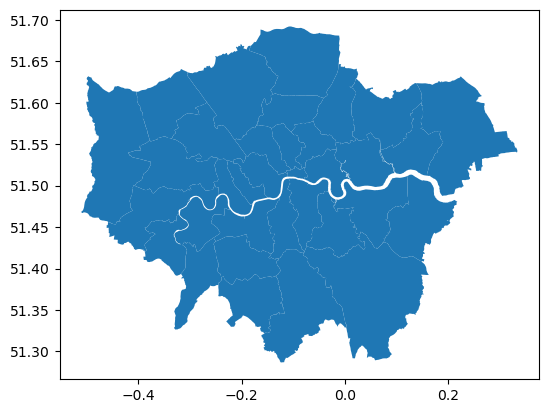

In [5]:
borough.plot()

In [6]:
raw = pd.read_csv("gas-consumption.csv")
raw.head()

,code,area,year,domestic_consumers _sales_GWh,domestic_ consumers_number_of_consumers_(thousands),commercial_and_industrial_consumers_sales_GWh,commercial_and_industrial_consumers_number_of_consumers_(thousands),all_consumers_sales_GWh,all_consumers_number_of_consumers_(thousands),sales_per_consumer_domestic_kWh,sales_per_consumer_commercial_and_industrial_kWh
0,E09000001,City of London,2001,869,50,1661,3,2530,53,17282,585754
1,E09000002,Barking and Dagenham,2001,961,56,339,1,1300,57,17151,538825
2,E09000003,Barnet,2001,2825,118,930,4,3755,122,23964,227728
3,E09000004,Bexley,2001,1615,79,1198,1,2813,80,20463,1335027
4,E09000005,Brent,2001,1962,94,817,2,2779,96,20979,400457


In [6]:
gas_consumption = ["area", "year", "sales_per_consumer_domestic_kWh" ]
gas_df = raw[gas_consumption]
gas_df.head()

,area,year,sales_per_consumer_domestic_kWh
0,City of London,2001,17282
1,Barking and Dagenham,2001,17151
2,Barnet,2001,23964
3,Bexley,2001,20463
4,Brent,2001,20979


In [7]:
gas_df = gas_df.rename(columns={'area':'NAME'})
gas_df.head()

,NAME,year,sales_per_consumer_domestic_kWh
0,City of London,2001,17282
1,Barking and Dagenham,2001,17151
2,Barnet,2001,23964
3,Bexley,2001,20463
4,Brent,2001,20979


In [8]:
merged = borough.merge(gas_df, on='NAME', how="left")
merged.sample(100)

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,year,sales_per_consumer_domestic_kWh
525,Camden,E09000007,2178.932,0.000,T,NaN,NaN,"POLYGON ((-0.14239 51.56912, -0.14248 51.56902...",2001,17189
618,Haringey,E09000014,2959.837,0.000,T,NaN,NaN,"POLYGON ((-0.09764 51.57365, -0.09777 51.57362...",2010,15026
602,Hackney,E09000012,1904.902,0.000,T,NaN,NaN,"POLYGON ((-0.09764 51.57365, -0.09753 51.57368...",2015,10547
491,Kensington and Chelsea,E09000020,1238.379,25.994,T,NaN,NaN,"POLYGON ((-0.18386 51.47742, -0.18401 51.47753...",2009,13941
377,Redbridge,E09000026,5644.225,2.300,F,NaN,NaN,"POLYGON ((0.06939 51.54413, 0.06913 51.54418, ...",2021,15396
...,...,...,...,...,...,...,...,...,...,...
638,Newham,E09000025,3857.806,237.637,T,NaN,NaN,"MULTIPOLYGON (((0.07551 51.52982, 0.07549 51.5...",2009,13326
210,Lambeth,E09000022,2724.940,43.927,T,NaN,NaN,"POLYGON ((-0.12843 51.48505, -0.12841 51.48506...",2001,17902
236,Southwark,E09000028,2991.340,105.139,T,NaN,NaN,"POLYGON ((-0.10890 51.50844, -0.10887 51.50845...",2006,13454
659,Barking and Dagenham,E09000002,3779.934,169.150,F,NaN,NaN,"MULTIPOLYGON (((0.07319 51.52937, 0.07319 51.5...",2009,12593


In [9]:
clean = merged[["NAME", "sales_per_consumer_domestic_kWh"]]
clean = clean.rename(columns={'sales_per_consumer_domestic_kWh':'kWh'})
clean = clean.astype({"kWh": "int"})
clean.head()

,NAME,kWh
0,Kingston upon Thames,21373
1,Kingston upon Thames,21546
2,Kingston upon Thames,21457
3,Kingston upon Thames,20245
4,Kingston upon Thames,19938


In [10]:
total = clean.groupby(['NAME'])['kWh'].sum().reset_index()
total["kWh"].head()

0    283634
1    398987
2    336043
3    359970
4    368836
Name: kWh, dtype: int32

In [11]:
geoTotal = borough.merge(total, on='NAME', how="left")

<Axes: >

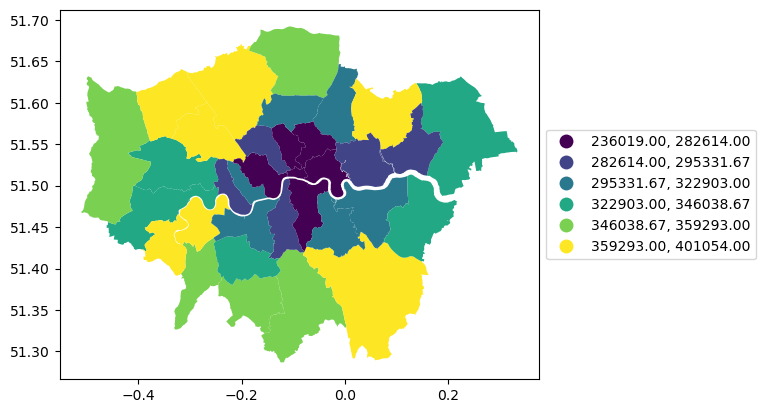

In [24]:
geoTotal = geoTotal[["NAME", "geometry", "kWh"]]
geoTotal.plot(column = "kWh", scheme="quantiles", k=6, legend=True, legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)})

<Axes: >

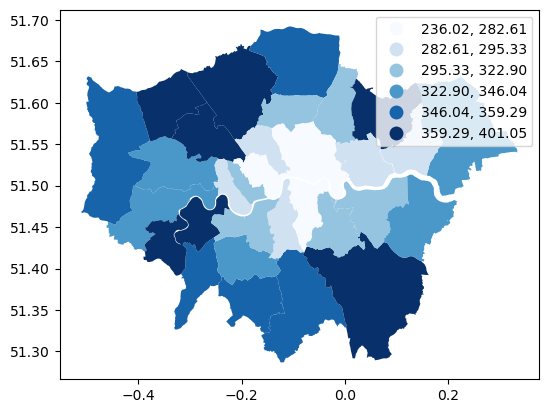

In [13]:
geoTotal["mWh"]= geoTotal["kWh"]/1000
geoTotal.plot(column = "mWh", cmap="Blues", scheme="quantiles", k=6, legend=True)

In [14]:
havering = gas_df.loc[gas_df['NAME'] == 'Havering'] 
havering = havering.rename(columns={'sales_per_consumer_domestic_kWh':'kWh'})
havering = havering.astype({"kWh": "int"})
havering

,NAME,year,kWh
15,Havering,2001,20759
60,Havering,2002,20955
105,Havering,2003,21015
150,Havering,2004,19955
195,Havering,2005,19421
241,Havering,2006,18564
287,Havering,2007,17931
333,Havering,2008,16008
379,Havering,2009,16008
425,Havering,2010,15976


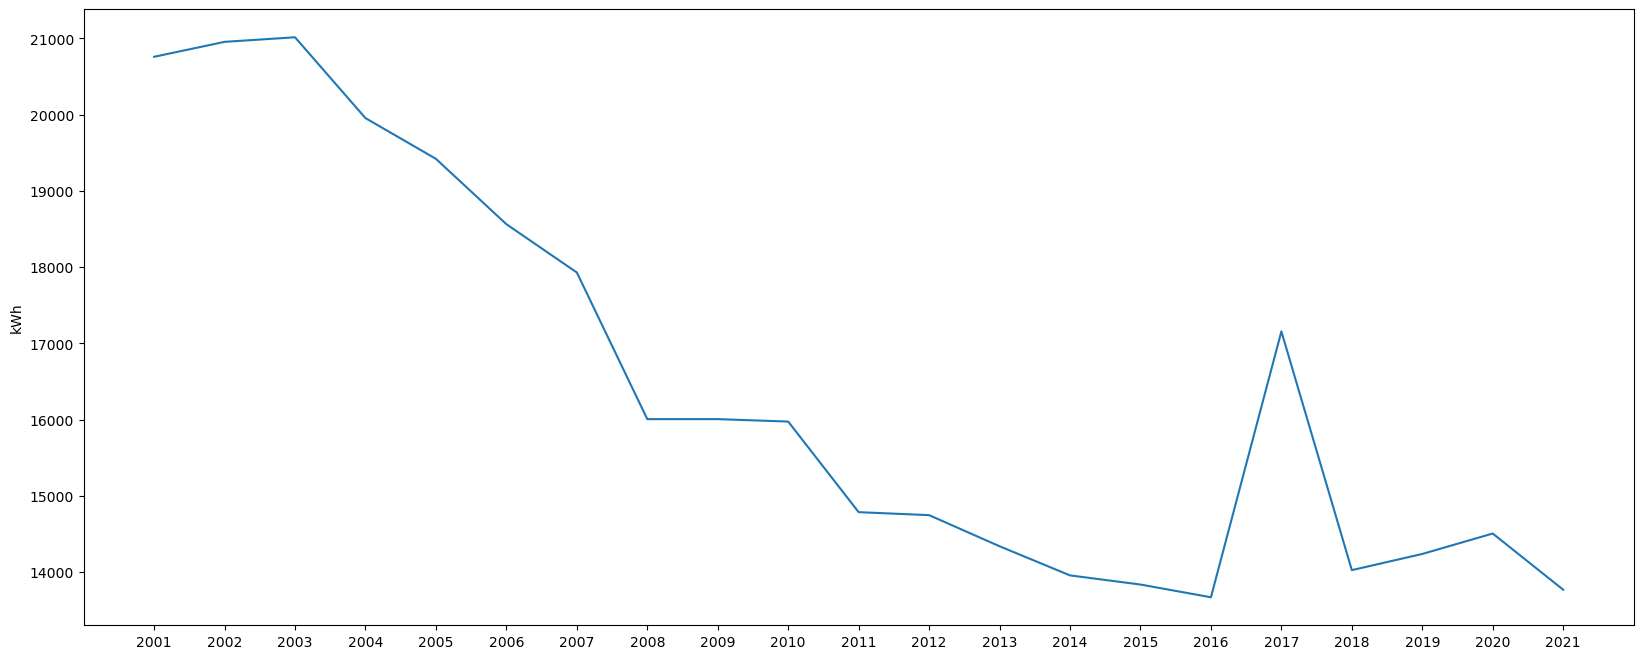

In [20]:
y = havering["kWh"]
x = havering["year"]
default_x_ticks= range(len(x))
plt.figure(figsize = (20,8))
plt.plot(default_x_ticks, y)
plt.xticks(default_x_ticks, x)
plt.ylabel('kWh')
plt.show()